In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 0)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from descriptive_stat import frequency_table, pareto_plot, bucket_table

In [2]:
data_path = r'C:\Users\DucTRung\Desktop\data_set\lux_stay'

In [3]:
df = pd.read_csv(data_path + '\luxstay_dataset.csv')

In [4]:
df.shape

(10149, 25)

# I. Checkin_price

In [6]:
df['checkin_price'].describe()

count    10149.000000
mean        44.122346
std         35.234650
min          3.460000
25%         21.920000
50%         32.880000
75%         55.000000
max        350.760000
Name: checkin_price, dtype: float64

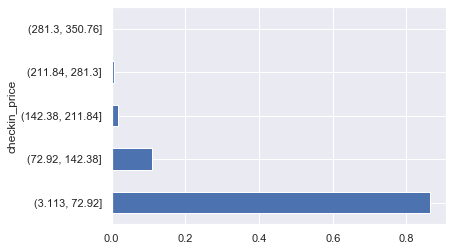

In [9]:
bucket_table(series=df['checkin_price'], bins=5, plot=True)

In [10]:
checkin_price = df[['checkin_price', 'property_type', 'province', 'district', 'exp_type', 'region']]

## 'checkin_price' by:

### 1/ 'province'

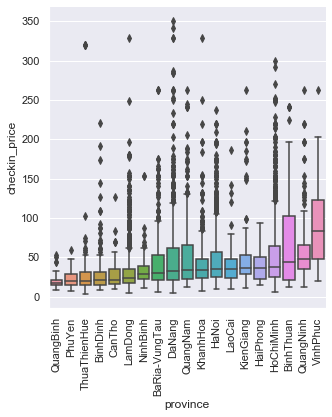

In [31]:
province_median = checkin_price.groupby(['province'])['checkin_price'].median().sort_values().reset_index()
ax1 = sns.catplot(x='province', y='checkin_price', data=checkin_price, kind='box', order=province_median['province'])
ax1.set_xticklabels(rotation=90)

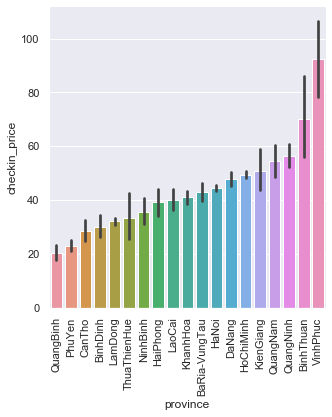

In [32]:
province_mean = checkin_price.groupby(['province'])['checkin_price'].mean().sort_values().reset_index()
ax2 = sns.catplot(x='province', y='checkin_price', data=checkin_price, kind='bar', order=province_mean['province'])
ax2.set_xticklabels(rotation=90)

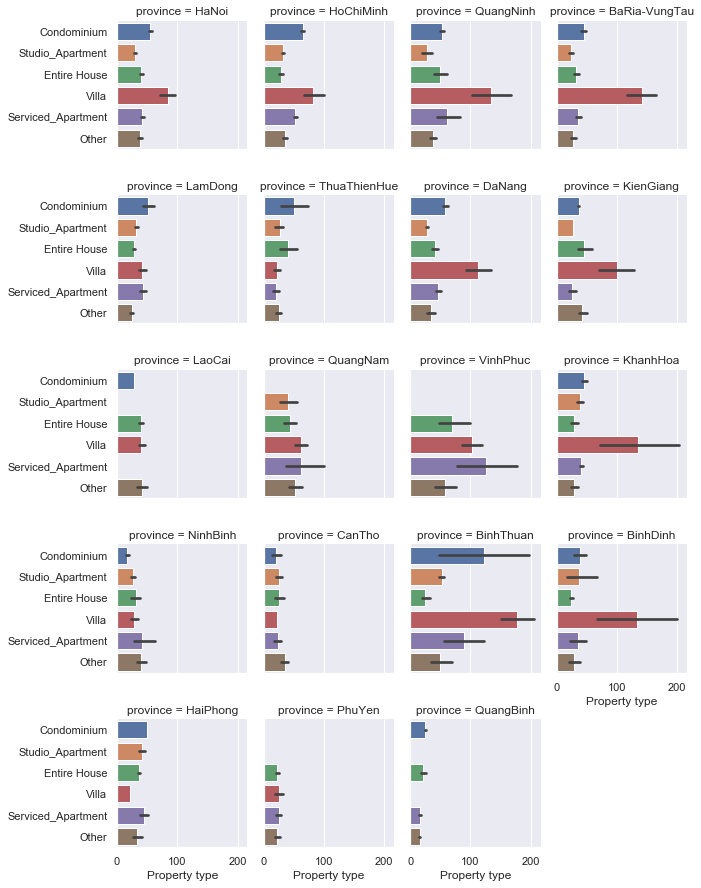

In [33]:
g = sns.catplot(x='checkin_price', y='property_type', col='province', 
                col_wrap=4, data=checkin_price, 
                kind='bar',
                height=2.5)
g.set_axis_labels('Property type', '')

### 2/ 'region'

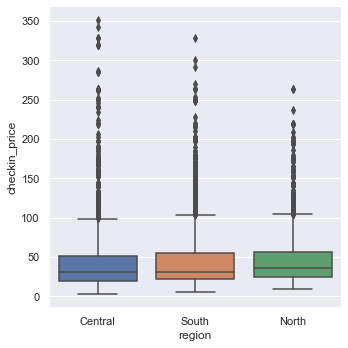

In [39]:
region_median = checkin_price.groupby(['region'])['checkin_price'].median().sort_values().reset_index()
ax1 = sns.catplot(x='region', y='checkin_price', data=checkin_price, kind='box', order=region_median['region'])

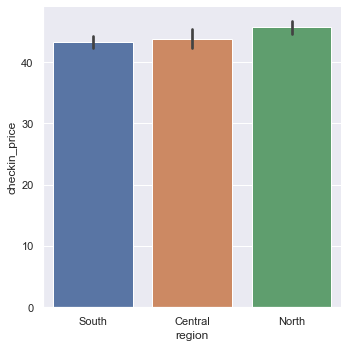

In [41]:
region_mean = checkin_price.groupby(['region'])['checkin_price'].mean().sort_values().reset_index()
ax2 = sns.catplot(x='region', y='checkin_price', data=checkin_price, kind='bar', order=region_mean['region'])

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

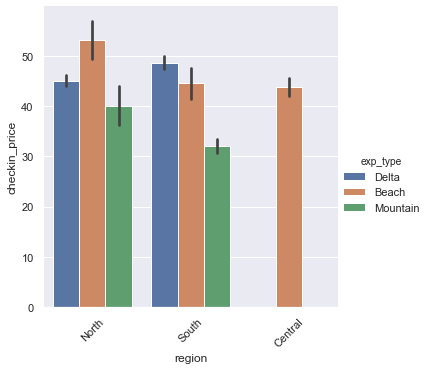

In [42]:
sns.catplot(x='region', y='checkin_price', hue='exp_type', data=checkin_price, kind='bar')
plt.xticks(rotation=45)

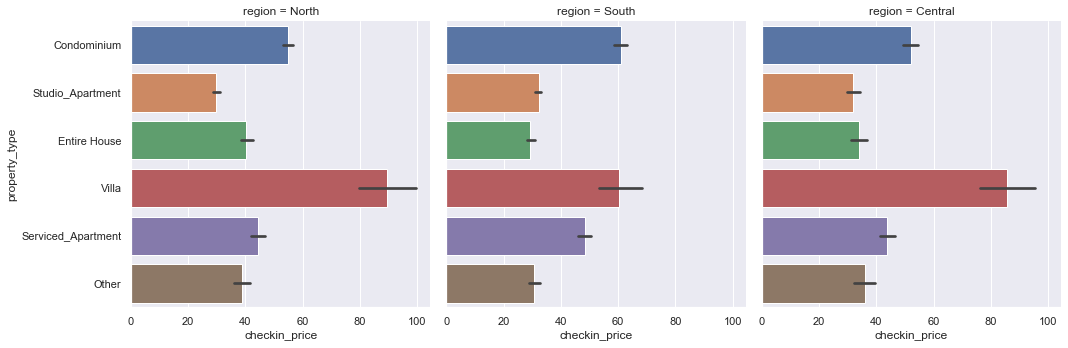

In [43]:
sns.catplot(col='region', x='checkin_price', y='property_type',
            data=checkin_price, kind='bar')

### 3/ 'property_type'

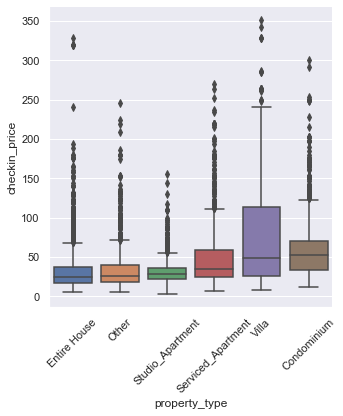

In [50]:
property_median = checkin_price.groupby(['property_type'])['checkin_price'].median().sort_values().reset_index()
ax1 = sns.catplot(x='property_type', y='checkin_price', data=checkin_price, kind='box', order=property_median['property_type'])
ax1.set_xticklabels(rotation=45)

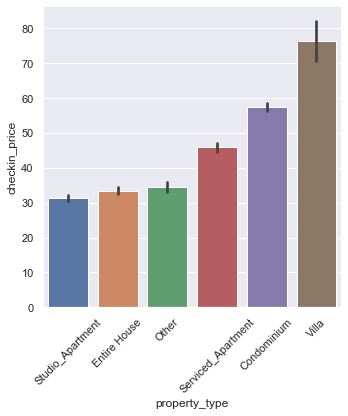

In [51]:
property_mean = checkin_price.groupby(['property_type'])['checkin_price'].mean().sort_values().reset_index()
ax2 = sns.catplot(x='property_type', y='checkin_price', data=checkin_price, kind='bar', order=property_mean['property_type'])
ax2.set_xticklabels(rotation=45)

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

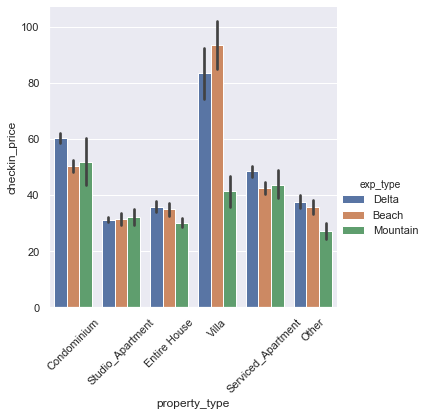

In [52]:
sns.catplot(x='property_type', y='checkin_price', hue='exp_type', data=checkin_price, kind='bar')
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

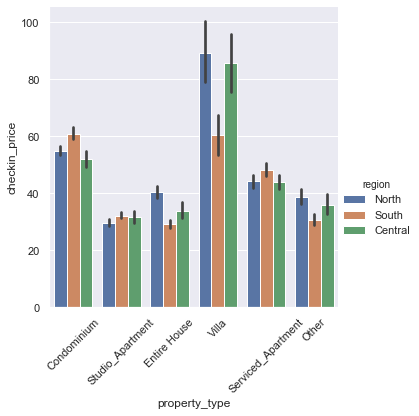

In [53]:
sns.catplot(x='property_type', y='checkin_price', hue='region', data=checkin_price, kind='bar')
plt.xticks(rotation=45)

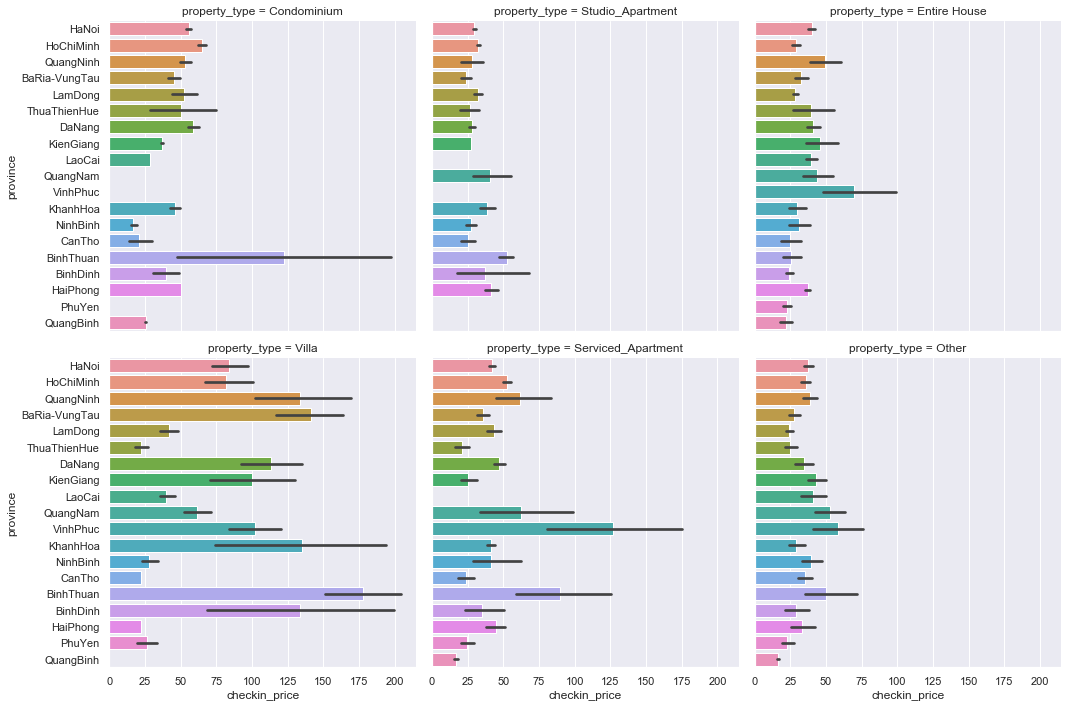

In [54]:
sns.catplot(col='property_type', x='checkin_price', y='province',
            col_wrap=3, data=checkin_price, kind='bar')

### 4/ 'exp_type'

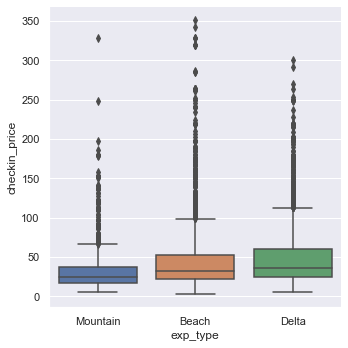

In [56]:
exp_median = checkin_price.groupby(['exp_type'])['checkin_price'].median().sort_values().reset_index()
ax1 = sns.catplot(x='exp_type', y='checkin_price', data=checkin_price, kind='box', order=exp_median['exp_type'])

   exp_type  checkin_price
0  Mountain      32.856562
1     Beach      44.842859
2     Delta      46.911722


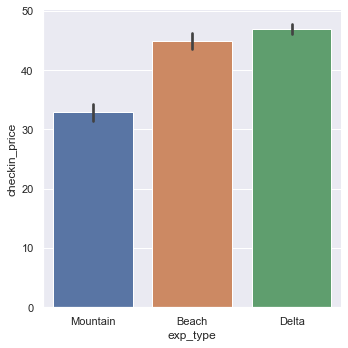

In [58]:
exp_mean = checkin_price.groupby(['exp_type'])['checkin_price'].mean().sort_values().reset_index()
print(exp_mean)
ax2 = sns.catplot(x='exp_type', y='checkin_price', data=checkin_price, kind='bar', order=exp_mean['exp_type'])

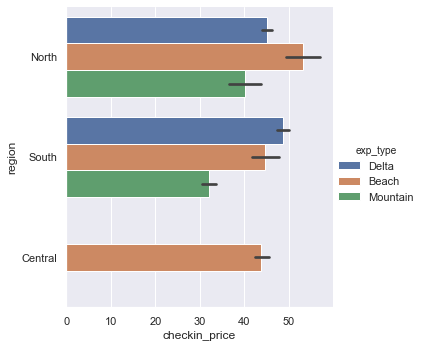

In [62]:
sns.catplot(x='checkin_price', y='region', hue='exp_type',
            data=checkin_price, kind='bar')

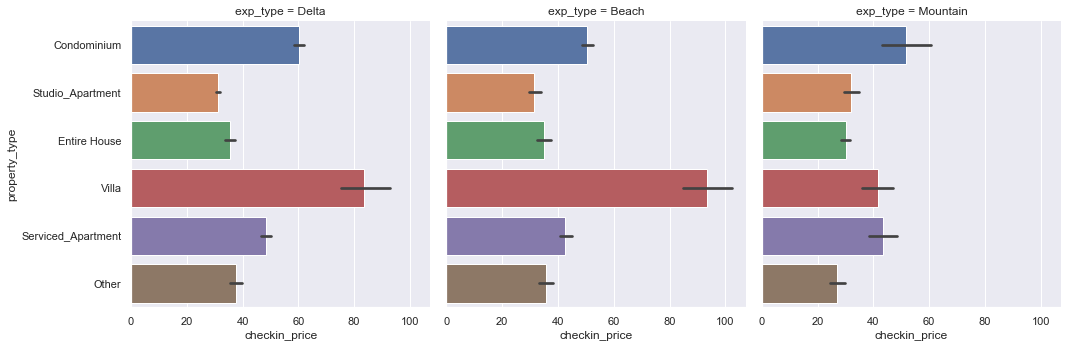

In [59]:
sns.catplot(col='exp_type', x='checkin_price', y='property_type',
            data=checkin_price, kind='bar')

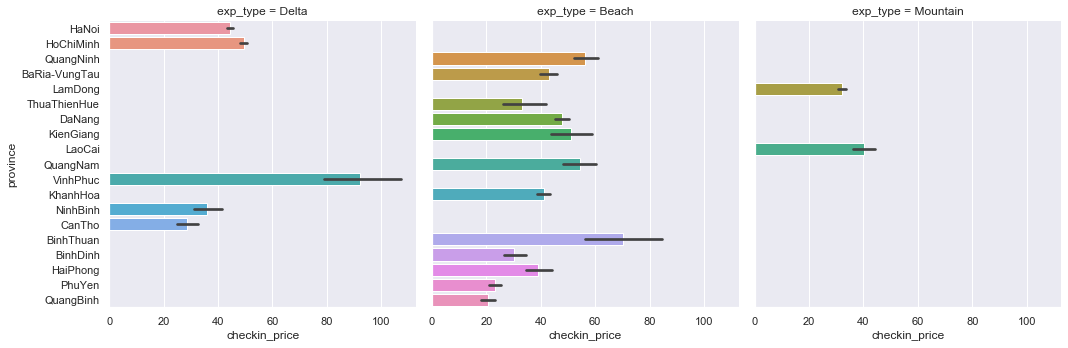

In [60]:
sns.catplot(col='exp_type', x='checkin_price', y='province',
            data=checkin_price, kind='bar')

# II. Nightly-Weekly Price

In [46]:
df[['nightly_price', 'weekly_price']].describe(include='all')

,nightly_price,weekly_price
count,6660.000000,6660.000000
mean,32.522413,34.961291
std,16.333078,17.410597
min,3.460000,4.170000
25%,20.610000,21.920000
50%,28.000000,30.250000
75%,40.000000,43.850000
max,83.530000,83.310000


In [64]:
price = df[['nightly_price', 'weekly_price', 'province', 'region', 'exp_type', 'property_type']]

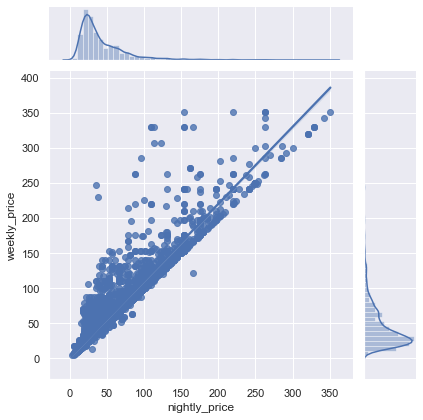

In [65]:
ax3 = sns.jointplot(data=price,
            x='nightly_price', y='weekly_price', kind='reg')

## by:

### 1/ Province

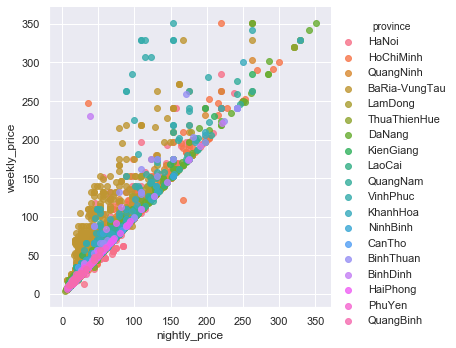

In [66]:
sns.lmplot(data=price, x='nightly_price', y='weekly_price',
           hue='province', fit_reg=False)

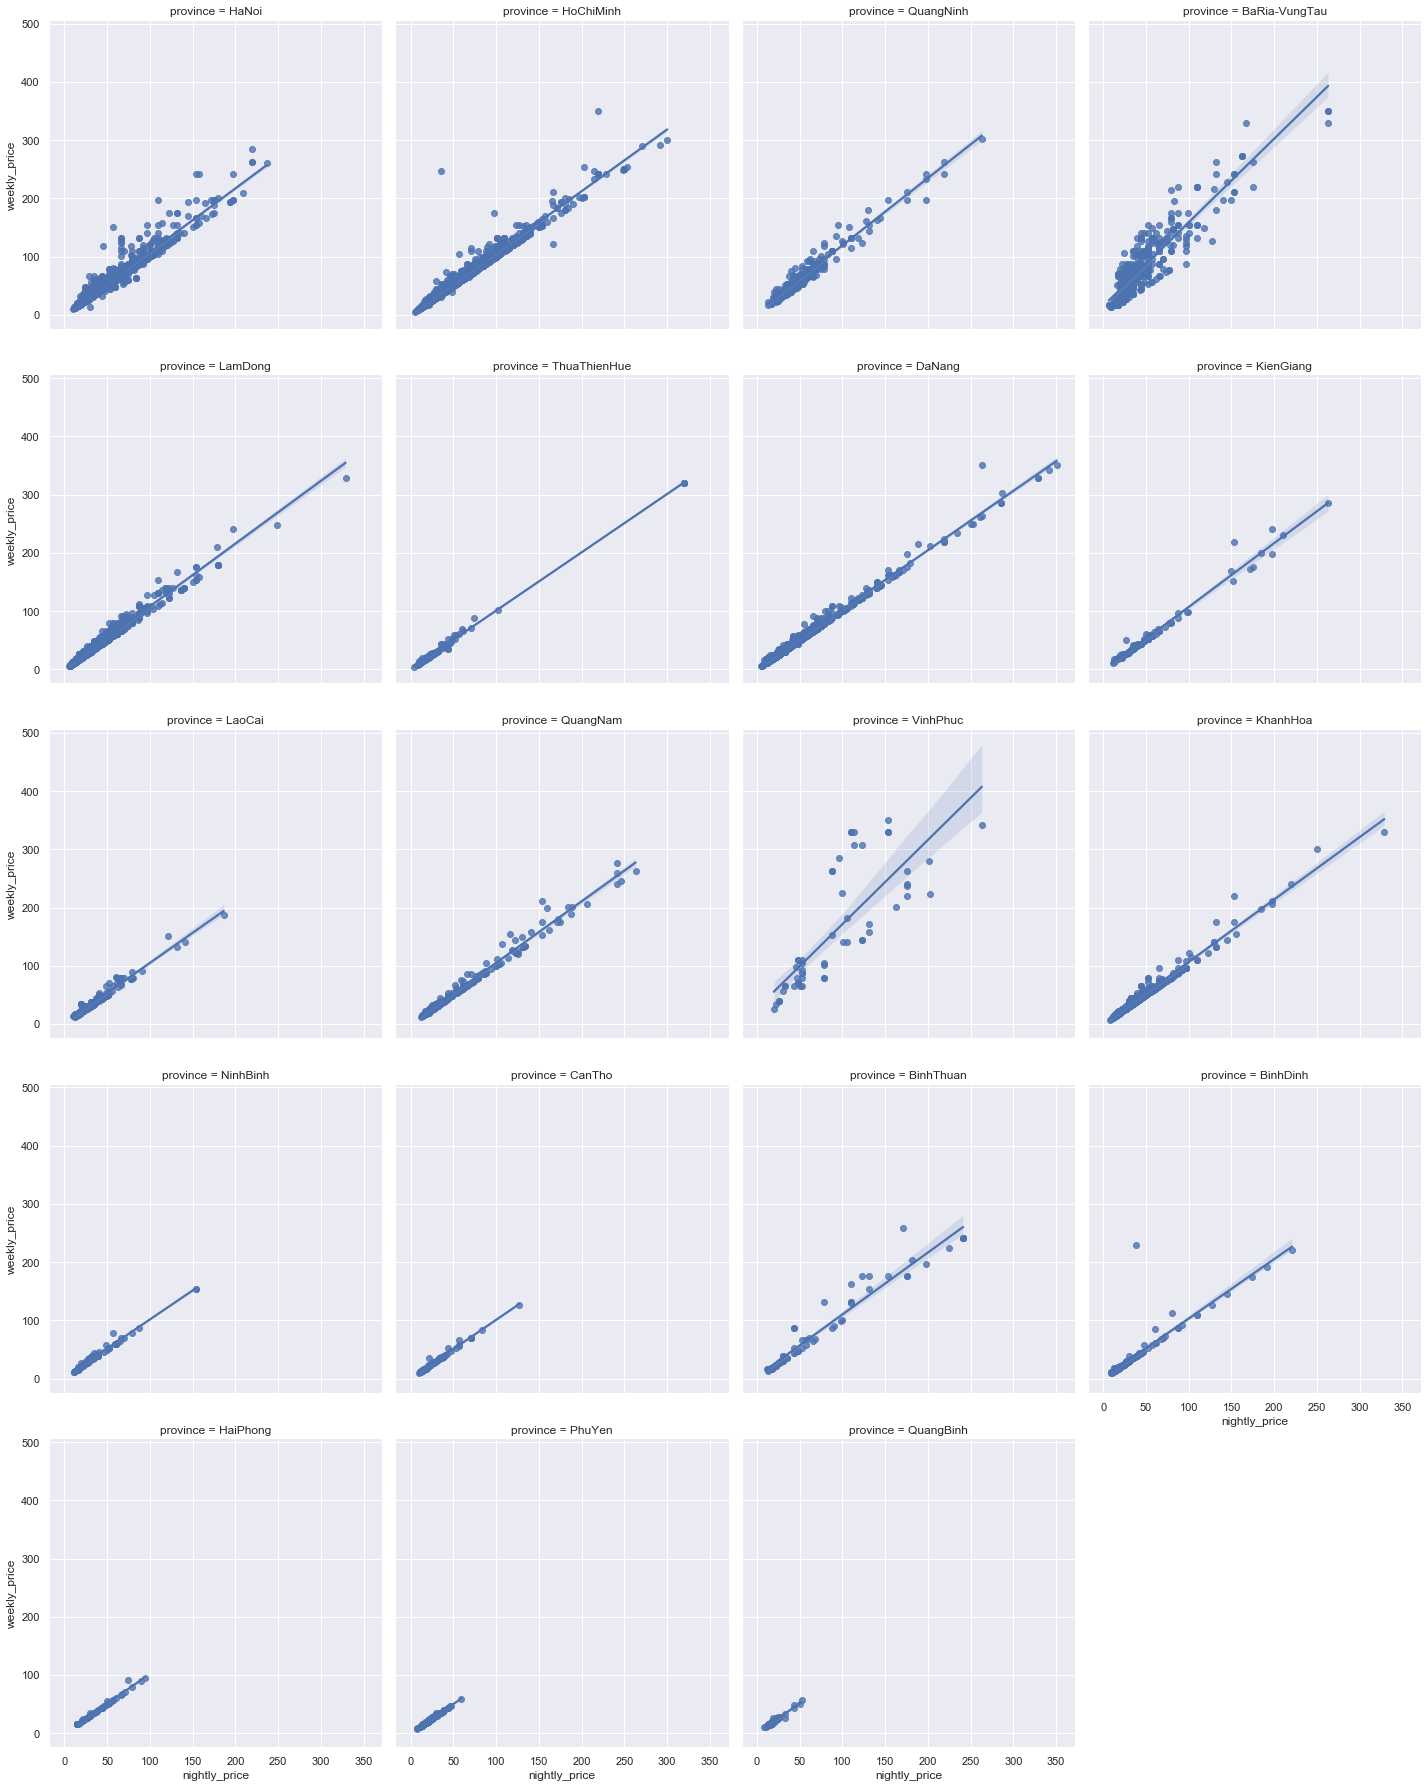

In [67]:
sns.lmplot(col='province', col_wrap=4,
           data=price, x='nightly_price', y='weekly_price')

 ### 2/ Region

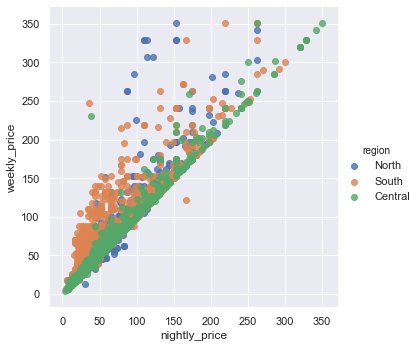

In [68]:
sns.lmplot(data=price, x='nightly_price', y='weekly_price',
           hue='region', fit_reg=False)

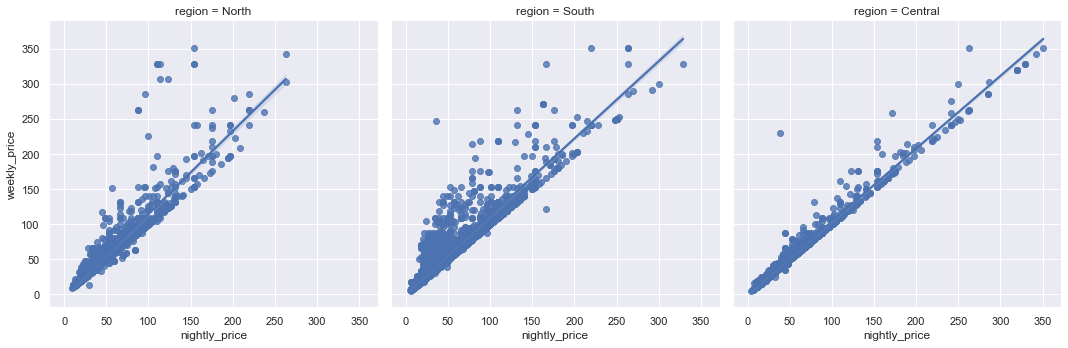

In [69]:
sns.lmplot(col='region', col_wrap=3,
           data=price, x='nightly_price', y='weekly_price')

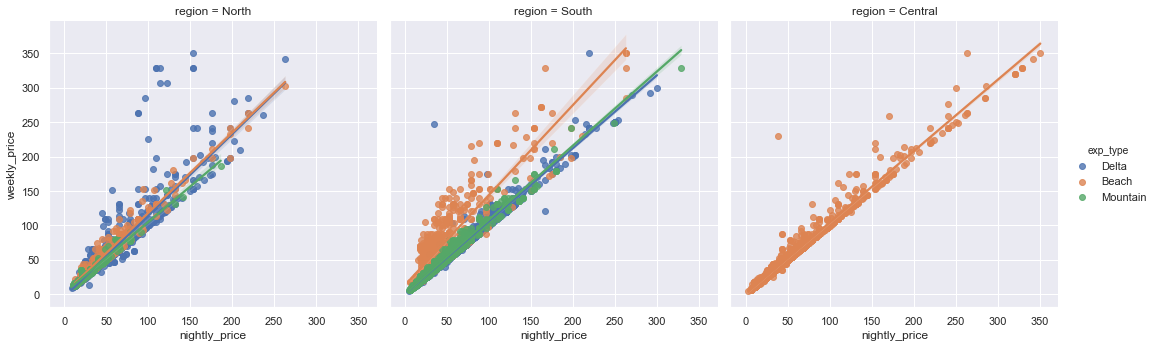

In [77]:
sns.lmplot(col='region', col_wrap=3,
           data=price, x='nightly_price', y='weekly_price',
           hue='exp_type')

### 3/ Experience type

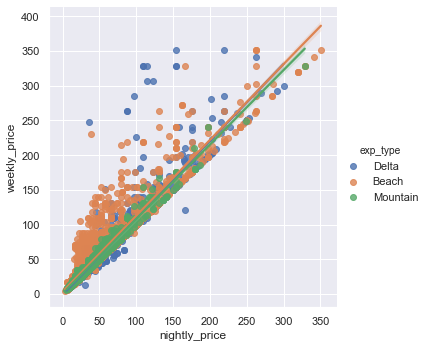

In [70]:
sns.lmplot(data=price, x='nightly_price', y='weekly_price',
           hue='exp_type', fit_reg=True)

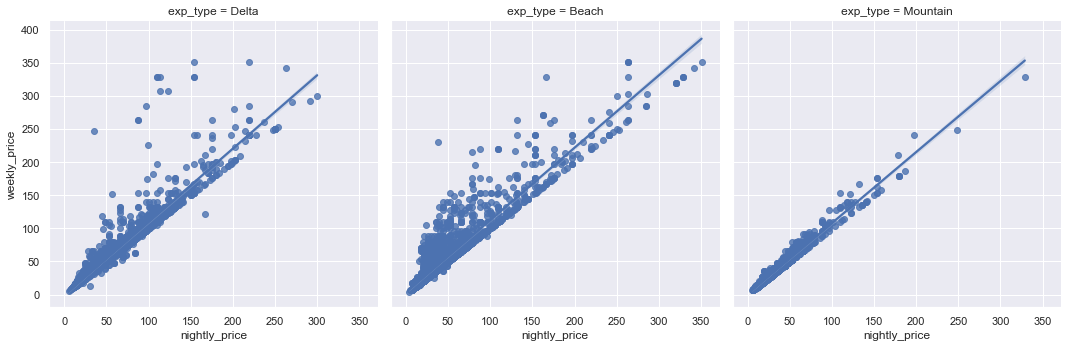

In [71]:
sns.lmplot(col='exp_type', col_wrap=3,
           data=price, x='nightly_price', y='weekly_price')

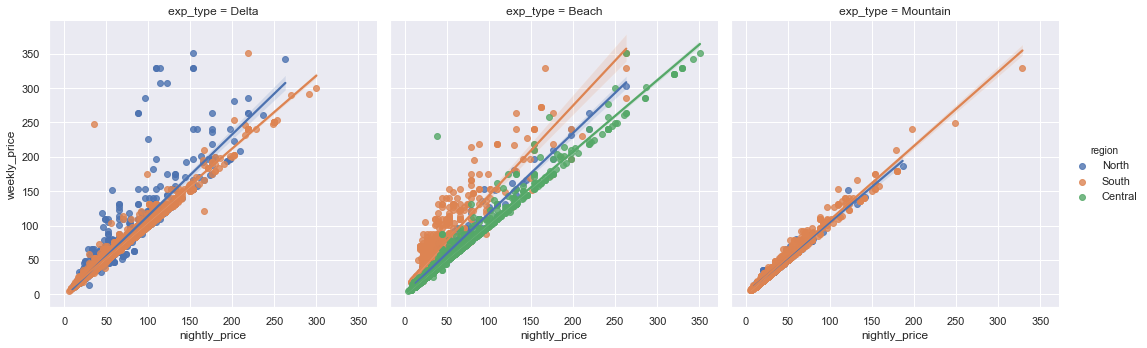

In [72]:
sns.lmplot(col='exp_type', col_wrap=3,
           data=price, x='nightly_price', y='weekly_price',
           hue='region')

### 4/ Property Type

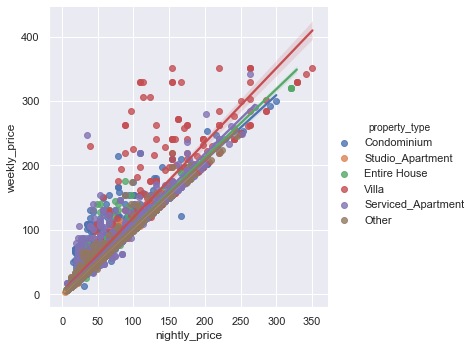

In [73]:
sns.lmplot(data=price, x='nightly_price', y='weekly_price',
           hue='property_type')

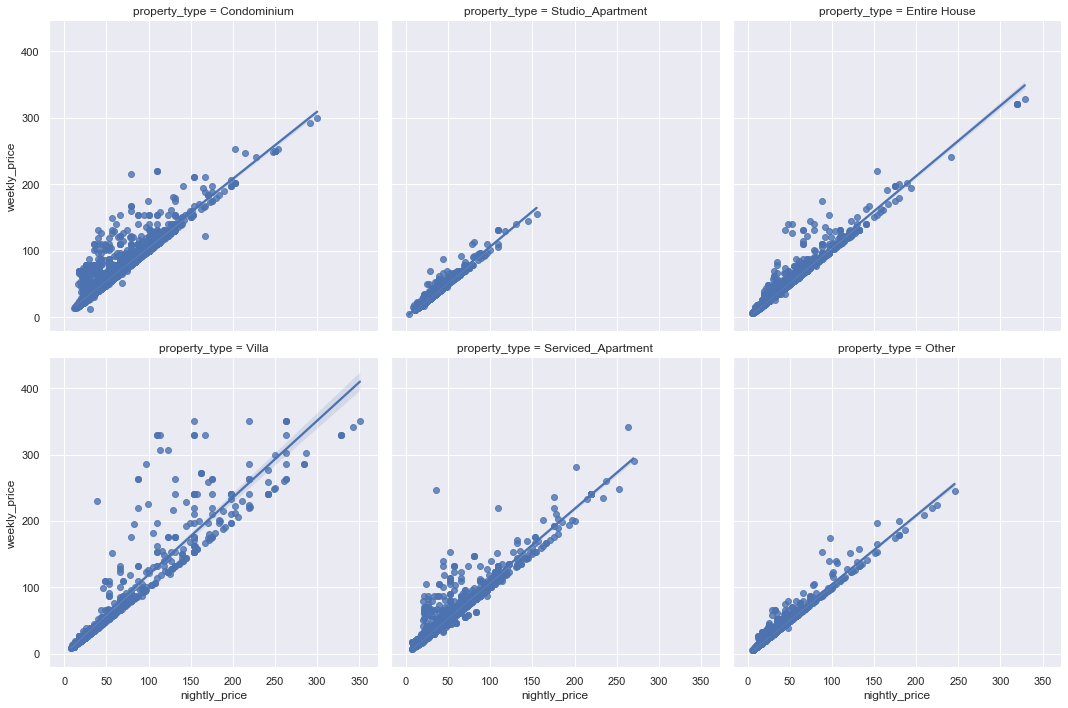

In [74]:
sns.lmplot(col='property_type', col_wrap=3,
           data=price, x='nightly_price', y='weekly_price')

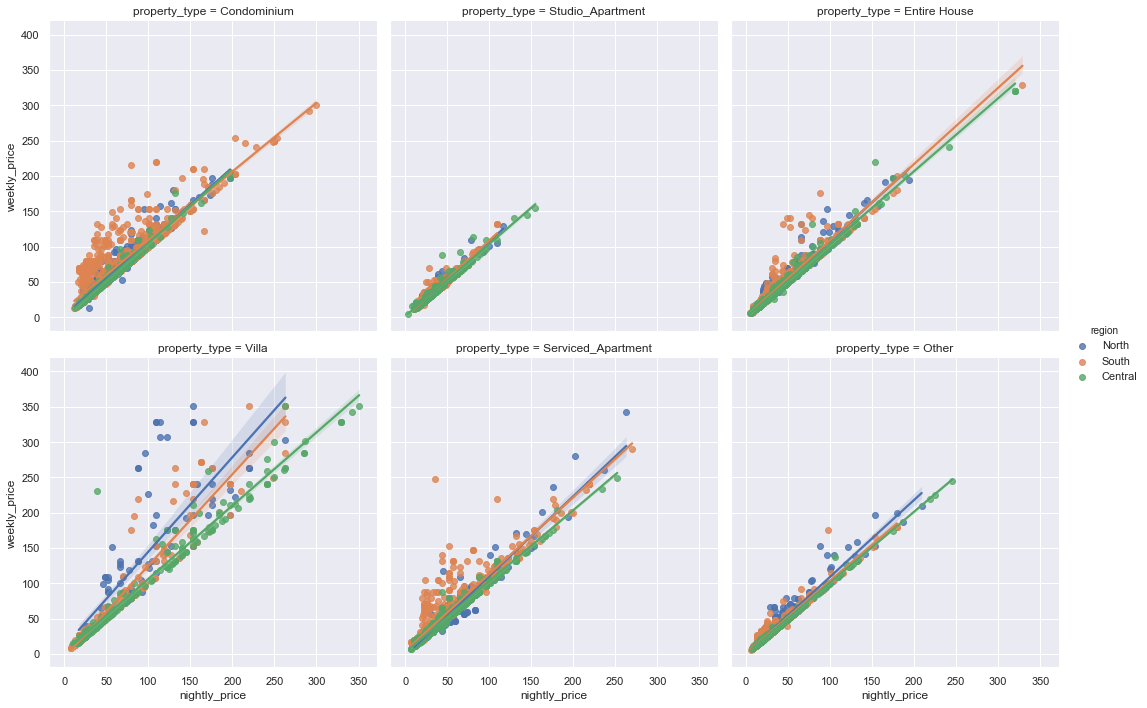

In [75]:
sns.lmplot(col='property_type', col_wrap=3,
           data=price, x='nightly_price', y='weekly_price',
          hue='region')

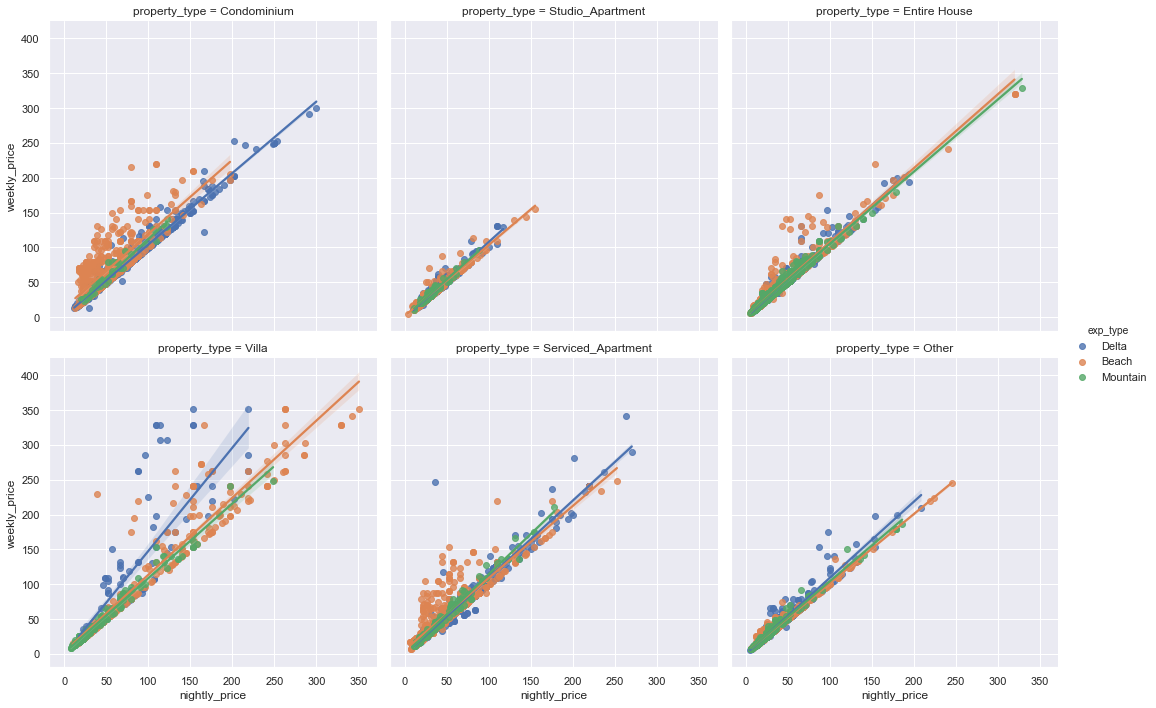

In [76]:
sns.lmplot(col='property_type', col_wrap=3,
           data=price, x='nightly_price', y='weekly_price',
          hue='exp_type')

# III. Price and Fee

## 1. Checkin price

In [101]:
price_fee = df[['checkin_price','cleaning_fee', 
                'additional_guests_fee', 'additional_children_fee', 'additional_infants_fee',
                 'exp_type', 'property_type', 'region', 'province']]

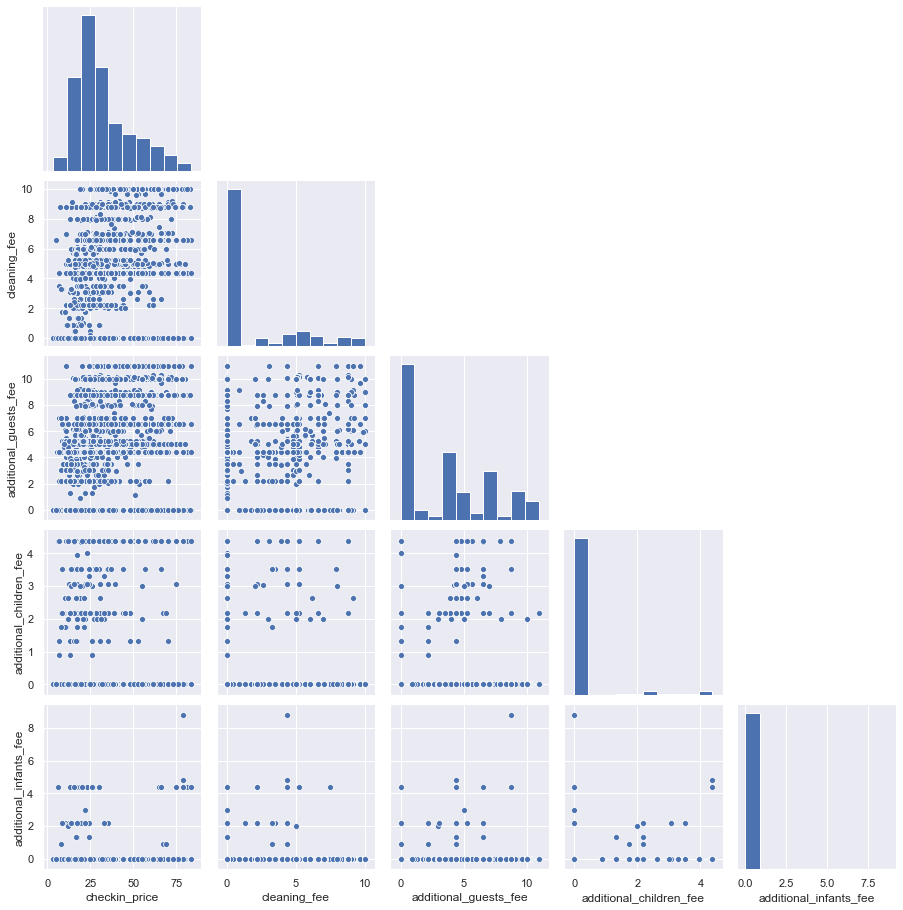

In [104]:
sns.pairplot(data=price_fee, corner=True)

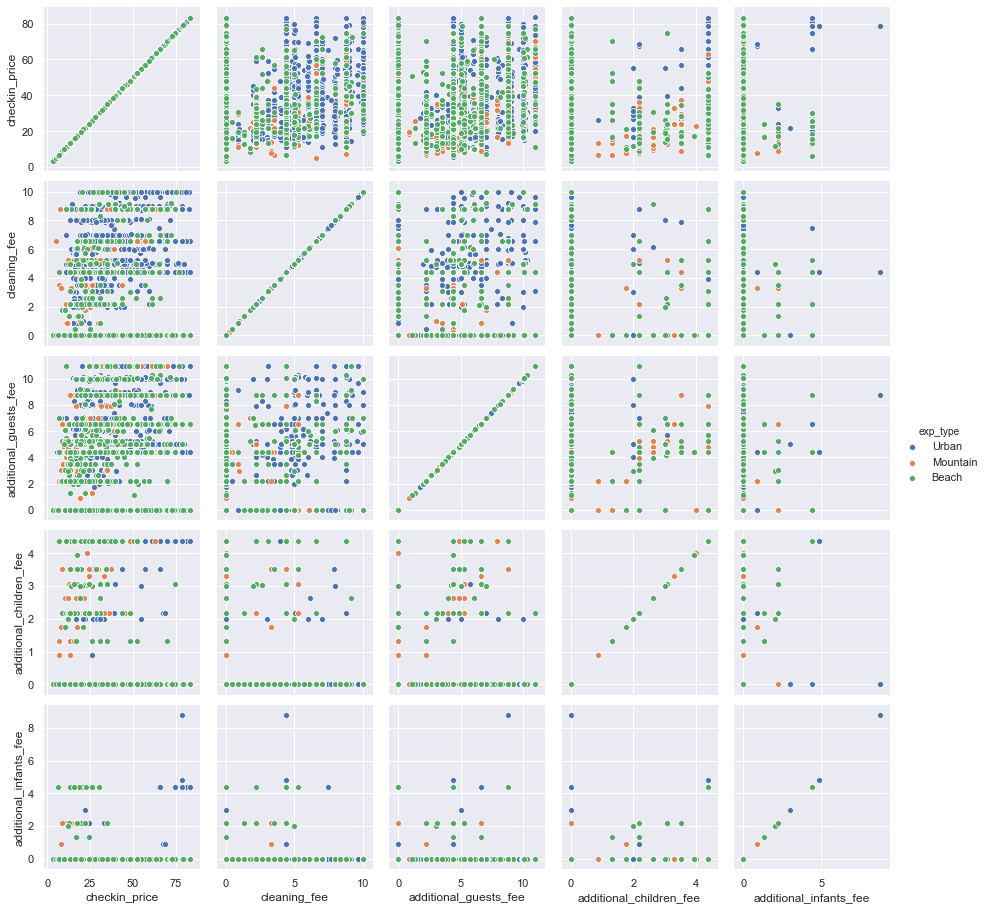

In [111]:
sns.pairplot(data=price_fee, hue='exp_type', diag_kind=None)

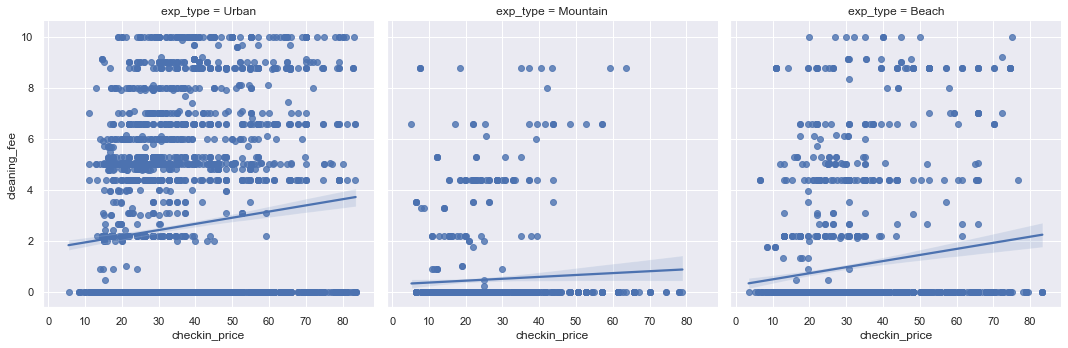

In [117]:
sns.lmplot(data=price_fee, x='checkin_price', y='cleaning_fee', 
              col='exp_type')

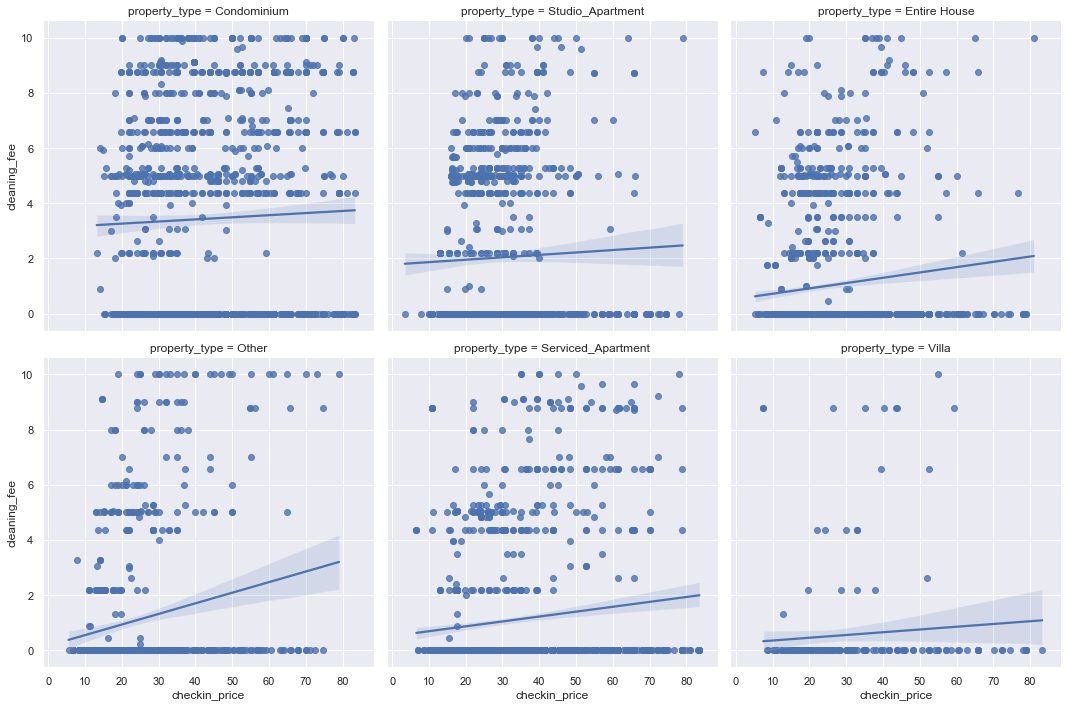

In [121]:
sns.lmplot(data=price_fee, x='checkin_price', y='cleaning_fee', 
              col='property_type', col_wrap=3)

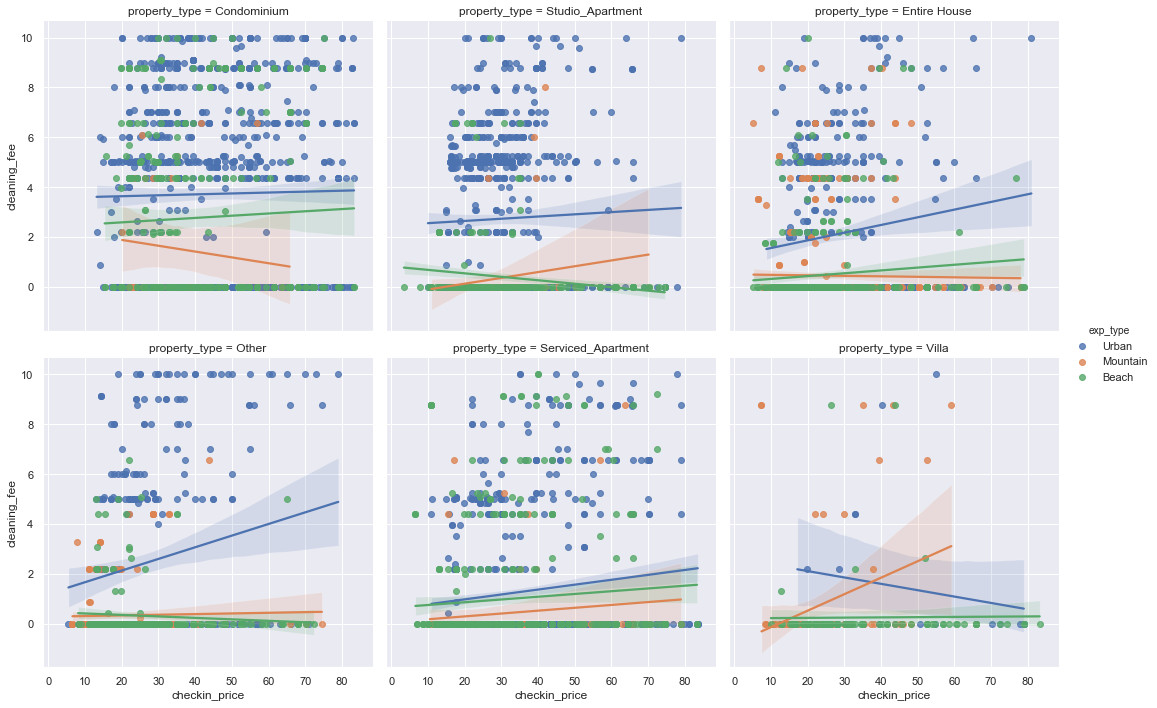

In [119]:
sns.lmplot(data=price_fee, x='checkin_price', y='cleaning_fee', 
              col='property_type', hue='exp_type', col_wrap=3)

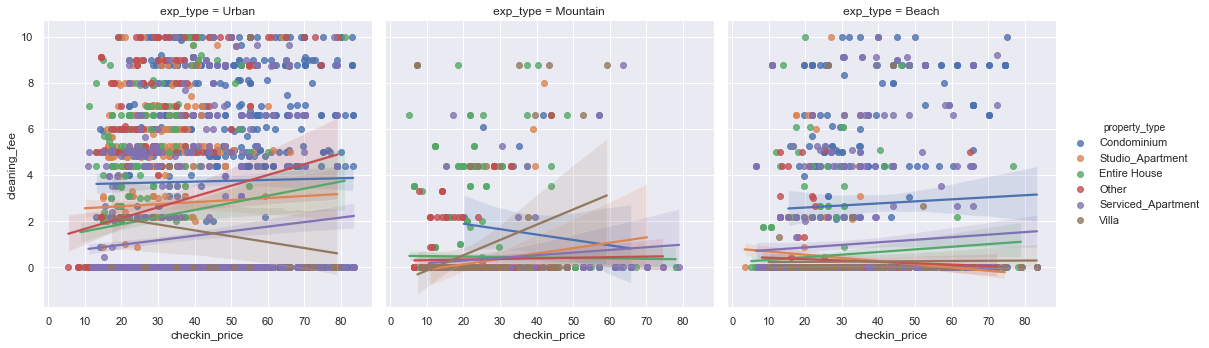

In [122]:
sns.lmplot(data=price_fee, x='checkin_price', y='cleaning_fee', 
              col='exp_type', hue='property_type', col_wrap=3)

## 2. Weekly price

In [124]:
price_fee = df[['weekly_price','cleaning_fee', 
                'additional_guests_fee', 'additional_children_fee', 'additional_infants_fee',
                 'exp_type', 'property_type', 'region', 'province']]

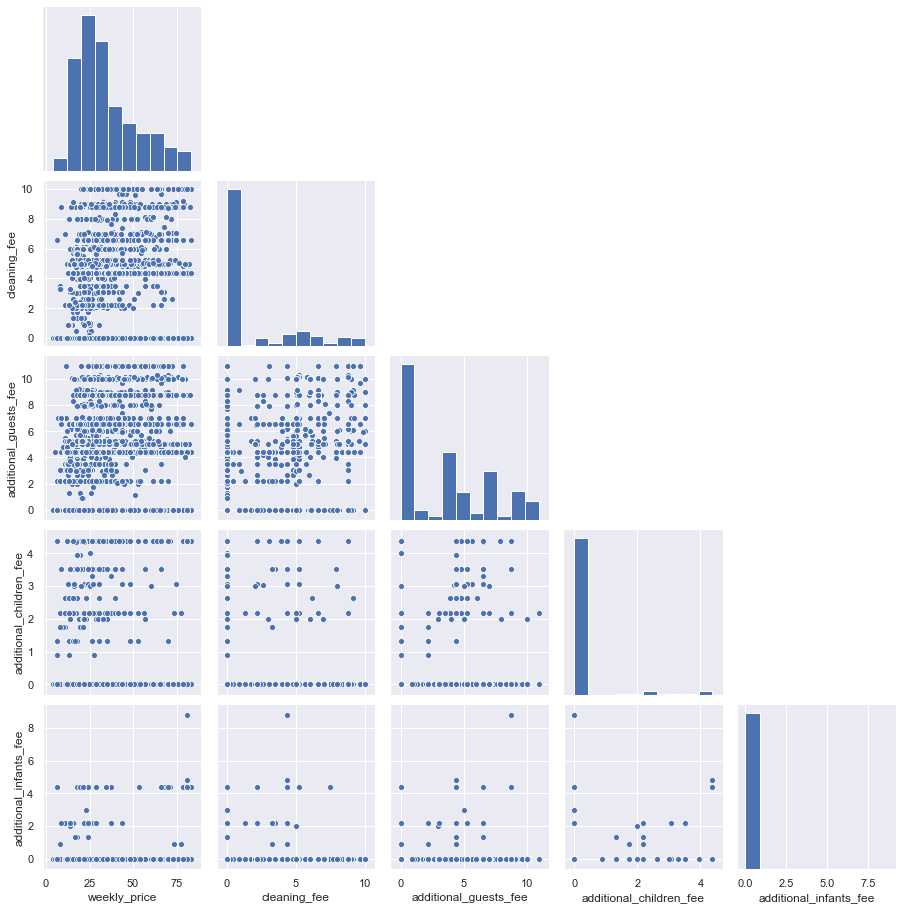

In [126]:
sns.pairplot(data=price_fee, corner=True)

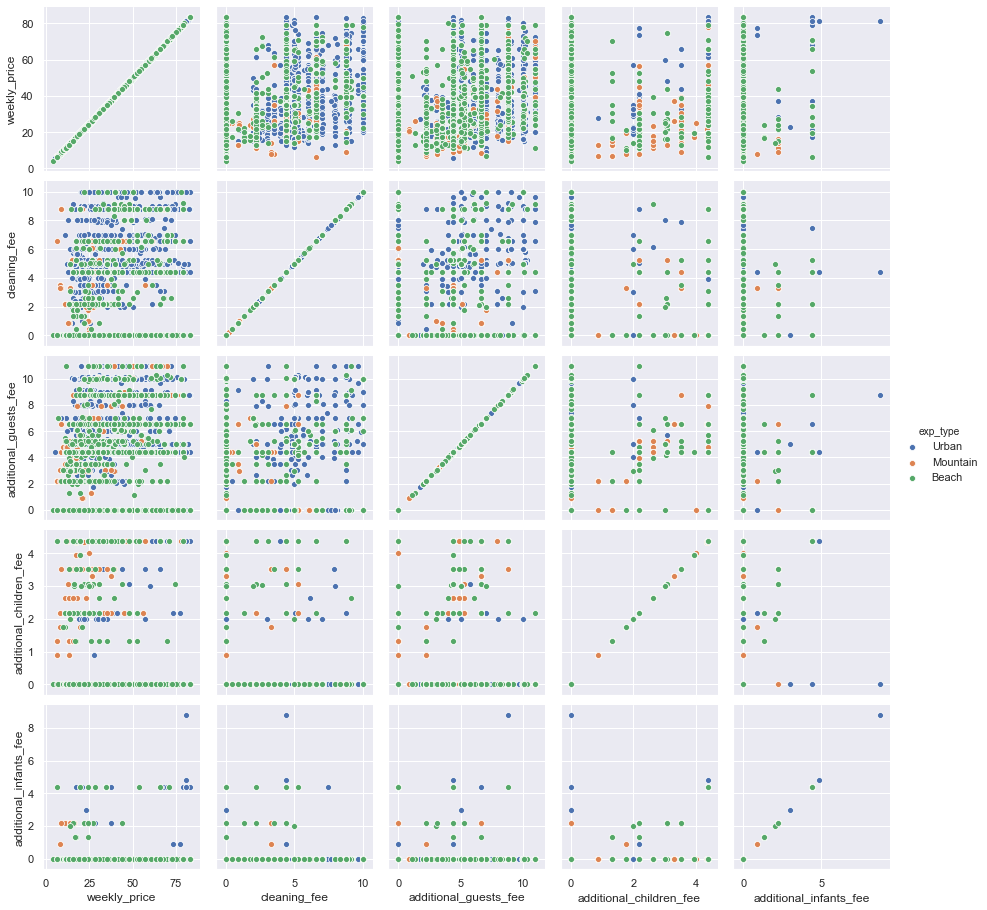

In [127]:
sns.pairplot(data=price_fee, hue='exp_type', diag_kind=None)

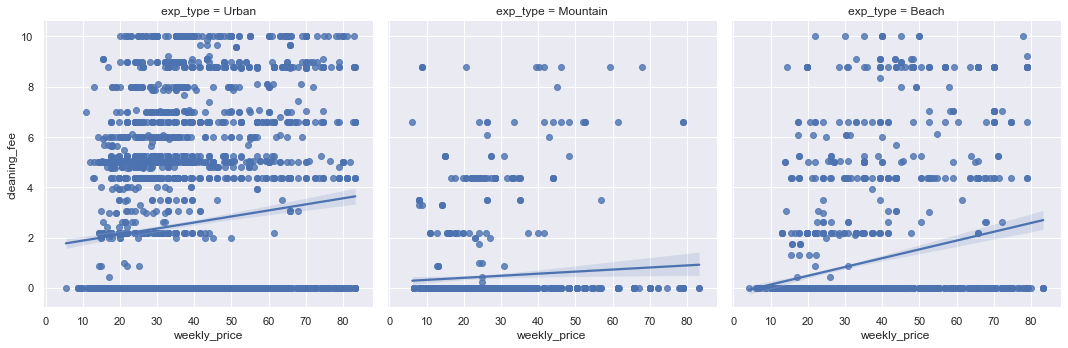

In [128]:
sns.lmplot(data=price_fee, x='weekly_price', y='cleaning_fee', 
              col='exp_type')

# IV. Fee

In [96]:
fee = df[['cleaning_fee', 'additional_guests_fee', 'additional_children_fee', 'additional_infants_fee', 'exp_type', 'property_type', 'region']]

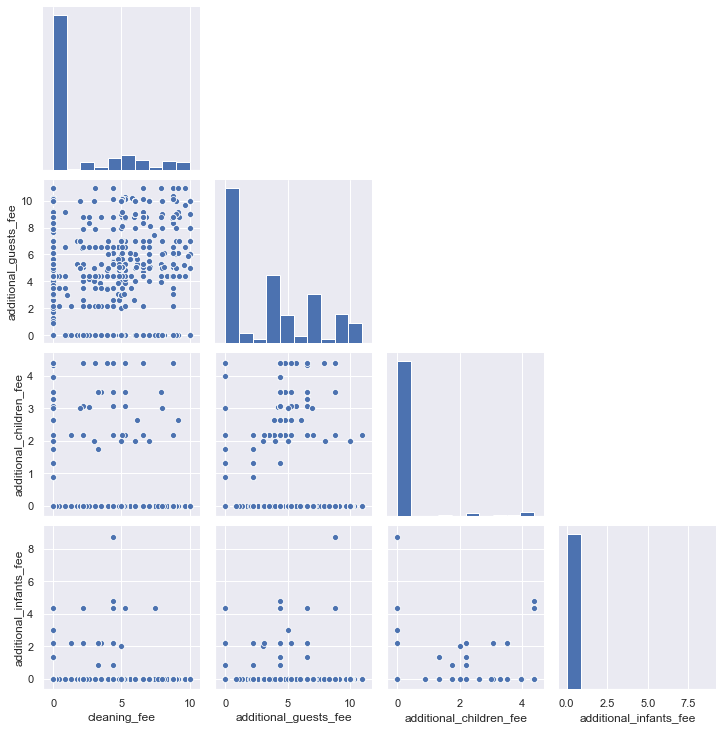

In [91]:
sns.pairplot(data=fee, corner=True)

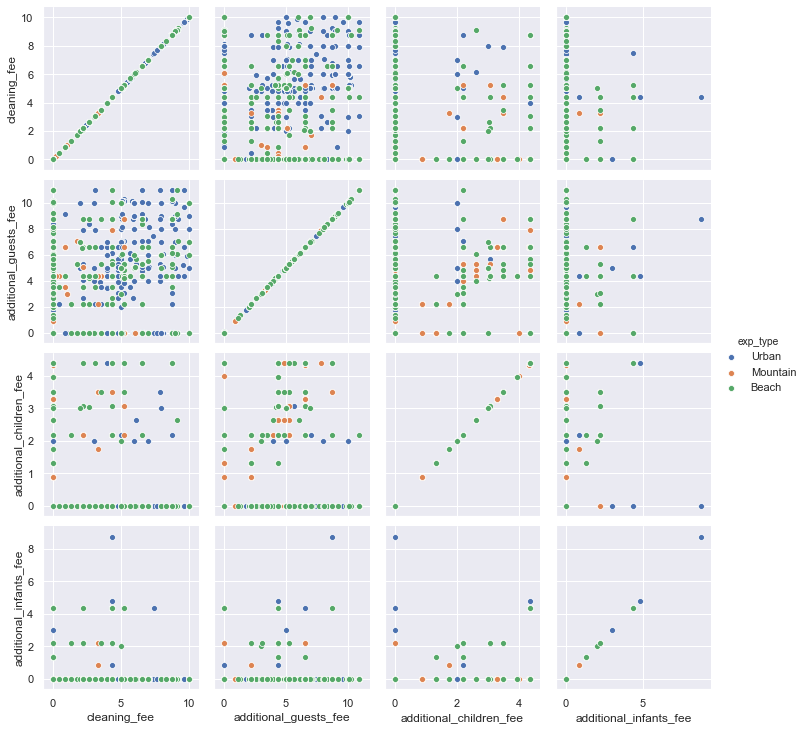

In [95]:
sns.pairplot(data=fee, hue='exp_type', diag_kind=None)

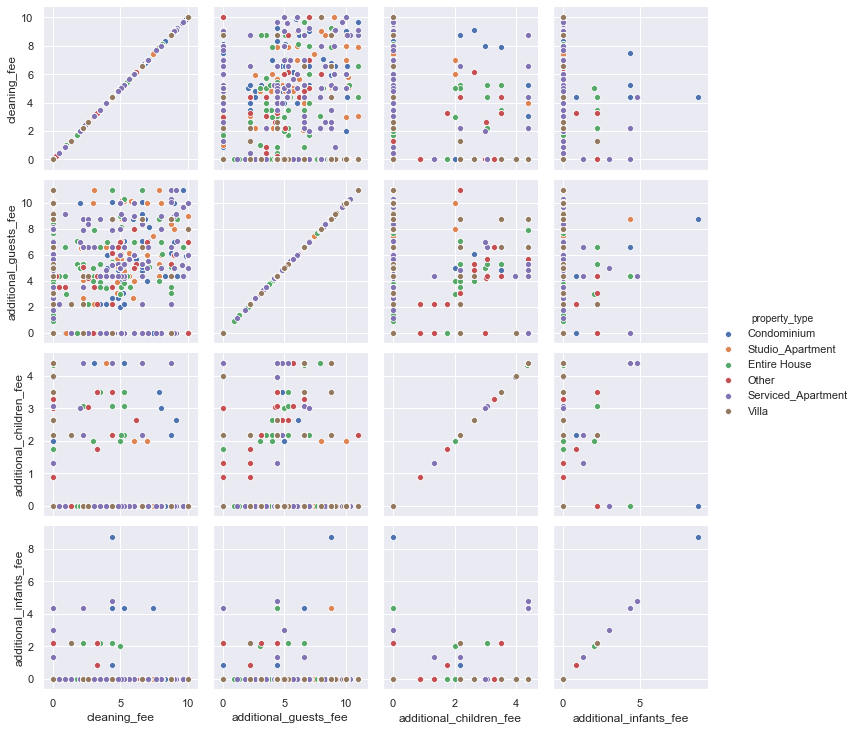

In [97]:
sns.pairplot(data=fee, hue='property_type', diag_kind=None)